#  অধ্যায় ৯ঃ মডেল সিলেক্ট করা  

এই অধ্যায়ে আমরা বিভিন্ন এল্গরিফদম ব্যবহার করে মডেল তৈরি করব। এবং এদের মধ্যে সবচেয়ে ভালো কাজ করছে এমন এলগরিদম সিলেক্ট করব।


##  ৯.১  ক্লাসিফিকেশন সমস্যা 

ক্লাসিফিকেশন সমস্যা সমাধানের জন্য আমরা বহুল ব্যবহৃত ৬ টি এলগরিদম ব্যবহার করব। এবং দেখব কোন এলগরিদমটি ভালো মডেল তৈরি করছে। এলগরিদমগুলো হচ্ছে -- 

 Logistic Regression.

 Linear Discriminant Analysis.

 k-Nearest Neighbors.

 Classification and Regression Trees.

 Naive Bayes.

 Support Vector Machines.

আমরা এখানে pima indian diabetes ডেটাসেট ব্যবহার করব 

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

LR: 0.774744 (0.044377)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.679836 (0.048187)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


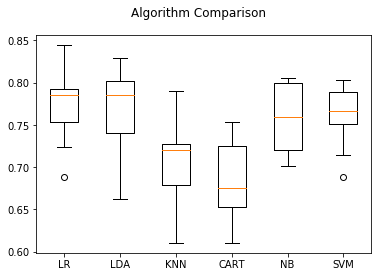

In [10]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
dataframe = pd.read_csv('diabetes.csv')
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

 এখানে দেখতে পাচ্ছি logistic regression সবচেয়ে ভালো কাজ করছে।সামনে কাজ করার জন্য আমরা একেই সিলেক্ট করব।

## ৯.২ রিগ্রেশন সমস্যা 

রিগ্রেশন সমস্যা সমাধানের জন্য  আমরা খানে যে যে  এলগরিদম ব্যবহার করব। -- 

 Linear Regression.
 Ridge Regression.
 LASSO Linear Regression.
 Elastic Net Regression.
এখানে আমরা boston house price ডেটাসেট ব্যবহার করব। 


LR: 0.718168 (0.098666)
LS: 0.662085 (0.091862)
RD: 0.716093 (0.102397)
EN: 0.670757 (0.089670)


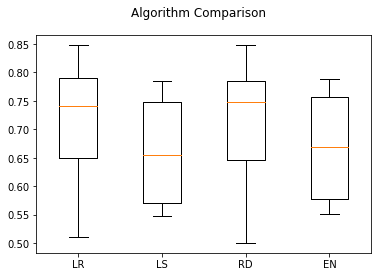

In [24]:
import pandas as pd
import numpy as np 
from sklearn  import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import cufflinks as cf
cf.go_offline()


boston = datasets.load_boston()
X = boston.data
Y = boston.target

models = []
models.append(('LR',LinearRegression()))
models.append(('LS', Lasso()))
models.append(('RD', Ridge()))
models.append(('EN', ElasticNet()))

# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



আমরা দেখতে পাচ্ছি liner regression সবচেয়ে ভালো কাজ করছে। পরবর্তী কাজ করার জন্য আমরা একেই ব্যবহার করব। 
